In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [ ]:
data = pd.read_csv('data.csv', sep=';') #https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success


In [ ]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.shape

(4424, 37)

In [ ]:
data.index

RangeIndex(start=0, stop=4424, step=1)

In [ ]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
data["Mother's occupation"].unique()

array([  5,   3,   9,   7,   4,   1, 125,   0,   6,   2,  90,   8, 141,
       175,  99, 191, 151, 194, 192, 132, 152, 134,  10, 143, 123, 173,
       193, 122, 144, 131, 171, 153])

In [ ]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
data['Course'].nunique()

17

In [ ]:
data.count()

Marital status                                    4424
Application mode                                  4424
Application order                                 4424
Course                                            4424
Daytime/evening attendance\t                      4424
Previous qualification                            4424
Previous qualification (grade)                    4424
Nacionality                                       4424
Mother's qualification                            4424
Father's qualification                            4424
Mother's occupation                               4424
Father's occupation                               4424
Admission grade                                   4424
Displaced                                         4424
Educational special needs                         4424
Debtor                                            4424
Tuition fees up to date                           4424
Gender                                            4424
Scholarshi

In [ ]:
data['Course'].value_counts()

9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64

In [ ]:
data.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [ ]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
data['Gender'].unique #1-male 0-female

<bound method Series.unique of 0       1
1       1
2       1
3       0
4       0
       ..
4419    1
4420    0
4421    0
4422    0
4423    0
Name: Gender, Length: 4424, dtype: int64>

In [ ]:
data[data['Gender']==0]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,1,1,1,9070,1,1,132.0,1,1,1,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
data.groupby('Scholarship holder').get_group(1)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
11,1,1,1,9500,1,1,136.0,1,19,38,...,0,8,8,7,13.214286,0,12.7,3.7,-1.70,Graduate
13,1,53,1,9254,1,42,110.0,1,1,1,...,0,6,8,5,11.000000,0,8.9,1.4,3.51,Graduate
14,1,1,1,9085,1,1,149.0,1,38,37,...,0,5,5,5,12.000000,0,10.8,1.4,1.74,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,1,1,1,9070,1,1,124.0,1,37,19,...,1,6,9,5,12.500000,0,10.8,1.4,1.74,Graduate
4412,1,43,1,9070,1,1,125.0,1,19,19,...,2,6,7,5,12.200000,0,13.9,-0.3,0.79,Enrolled
4417,1,1,1,9070,1,1,132.0,1,1,1,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,Graduate
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout


In [ ]:
data[data.Target == 'Dropout']

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout
12,1,1,2,9853,1,1,133.0,1,19,37,...,0,6,0,0,0.000000,0,12.7,3.7,-1.70,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,2,39,1,9773,1,1,100.0,1,37,37,...,0,6,10,6,11.666667,0,12.7,3.7,-1.70,Dropout
4411,1,44,1,9130,1,39,150.0,1,37,37,...,0,6,11,3,13.333333,0,13.9,-0.3,0.79,Dropout
4415,4,39,1,9500,1,19,133.1,1,37,37,...,0,7,12,3,11.083333,0,11.1,0.6,2.02,Dropout
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout


In [ ]:
data=data.rename(columns = {"Mother's qualification" : 'Mother'})

In [ ]:
data = data.rename(columns={"Father's qualification": 'Father'})

In [ ]:
data.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother,Father,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.GDP.mean()

0.001968806509945778

In [ ]:
data['Unemployment rate'].mean()

11.56613924050633

In [ ]:
data['Inflation rate'].mean()

1.228028933092224

In [ ]:
data[data['Application mode']==42] #42-transfer

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother,Father,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
65,4,42,1,9500,1,19,133.1,1,1,1,...,1,8,10,5,11.000000,0,13.9,-0.3,0.79,Dropout
85,1,42,1,9500,1,1,160.0,1,37,38,...,0,8,8,7,13.080000,0,10.8,1.4,1.74,Graduate
173,1,42,1,8014,0,1,150.0,1,19,2,...,0,6,8,5,12.000000,0,9.4,-0.8,-3.12,Graduate
276,1,42,1,9853,1,1,120.0,1,37,38,...,0,6,10,3,10.666667,0,12.7,3.7,-1.70,Dropout
321,1,42,1,9500,1,1,100.0,1,37,37,...,0,8,8,7,13.058571,0,10.8,1.4,1.74,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,1,42,1,9119,1,1,140.0,1,3,3,...,0,5,0,0,0.000000,0,10.8,1.4,1.74,Dropout
4057,1,42,1,9003,1,39,140.0,1,19,1,...,0,6,12,4,13.666667,0,15.5,2.8,-4.06,Enrolled
4189,1,42,1,9254,1,1,154.0,1,38,37,...,3,12,20,8,12.000000,0,9.4,-0.8,-3.12,Graduate
4306,1,42,1,9147,1,1,135.0,1,19,1,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout


In [ ]:
data[data['Target'].str.contains('Graduate')]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother,Father,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,1,1,1,9070,1,1,132.0,1,1,1,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,Graduate
4418,1,44,1,9070,1,39,120.0,1,3,38,...,5,9,10,7,13.142857,1,16.2,0.3,-0.92,Graduate
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
data[(data['Course']==9119) & (data['Age at enrollment']==18)] #9119-Informatics Engineering 

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother,Father,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
89,1,43,2,9119,1,1,115.0,1,38,19,...,0,5,9,0,0.000000,0,15.5,2.8,-4.06,Enrolled
544,1,17,2,9119,1,1,127.0,1,19,1,...,0,5,8,5,12.600000,0,8.9,1.4,3.51,Enrolled
567,1,17,4,9119,1,1,129.0,1,34,36,...,0,5,10,3,11.333333,4,7.6,2.6,0.32,Dropout
835,1,1,3,9119,1,1,133.0,1,3,1,...,0,5,10,2,11.000000,0,8.9,1.4,3.51,Enrolled
854,1,17,4,9119,1,1,127.0,1,19,19,...,0,5,8,0,0.000000,0,9.4,-0.8,-3.12,Enrolled
860,1,18,2,9119,1,1,136.0,1,1,2,...,0,5,9,3,13.250000,0,13.9,-0.3,0.79,Dropout
963,1,1,2,9119,1,1,149.0,1,38,38,...,0,5,9,2,12.500000,2,7.6,2.6,0.32,Enrolled
975,1,17,3,9119,1,1,120.0,1,1,19,...,0,5,8,3,10.333333,0,8.9,1.4,3.51,Enrolled
1172,1,42,1,9119,1,1,144.0,1,34,34,...,0,5,7,1,12.000000,0,10.8,1.4,1.74,Dropout
1237,1,18,1,9119,1,1,146.0,1,1,37,...,0,5,5,0,0.000000,0,9.4,-0.8,-3.12,Dropout


In [ ]:
data['Age at enrollment'].unique()

array([20, 19, 45, 50, 18, 22, 21, 34, 37, 43, 55, 39, 29, 24, 27, 23, 26,
       33, 35, 25, 44, 36, 47, 28, 38, 30, 31, 32, 40, 42, 48, 49, 46, 41,
       70, 60, 53, 51, 52, 54, 61, 58, 59, 17, 57, 62])

In [ ]:
data[(data['Age at enrollment'] == 70)]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother,Father,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
689,4,39,2,9147,1,19,133.1,1,37,37,...,0,5,9,0,0.0,0,10.8,1.4,1.74,Dropout


In [ ]:
data[(data['Daytime/evening attendance\t']==0) | (data['Nacionality']==101)] # 0-evening attendance; 101-Mexican

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother,Father,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
33,1,18,1,8014,0,1,138.0,1,19,1,...,0,6,8,6,14.375000,0,12.4,0.5,1.79,Graduate
34,1,1,1,9991,0,1,130.0,1,2,37,...,0,5,9,5,13.428571,0,13.9,-0.3,0.79,Graduate
38,4,39,1,9991,0,1,120.0,1,19,19,...,0,5,5,5,11.600000,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,1,39,2,8014,0,1,141.0,1,37,37,...,0,6,8,6,15.625000,0,12.4,0.5,1.79,Graduate
4387,2,1,1,9991,0,1,150.0,1,37,37,...,0,5,6,5,10.166667,0,10.8,1.4,1.74,Dropout
4393,1,39,1,9991,0,1,120.0,1,38,38,...,0,5,10,3,10.666667,0,11.1,0.6,2.02,Graduate
4400,2,39,1,9991,0,1,133.1,1,37,37,...,0,5,12,3,13.333333,0,9.4,-0.8,-3.12,Dropout


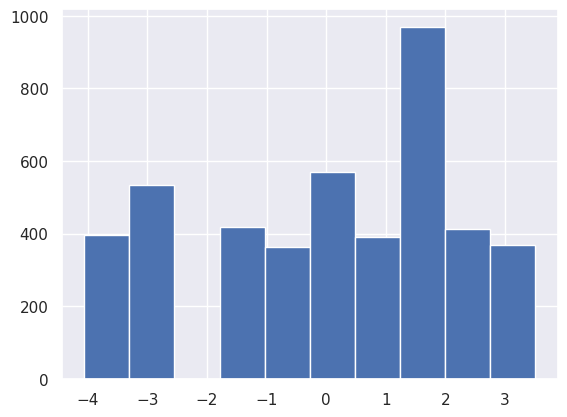

In [ ]:
plt.hist(data['GDP'])
plt.show()

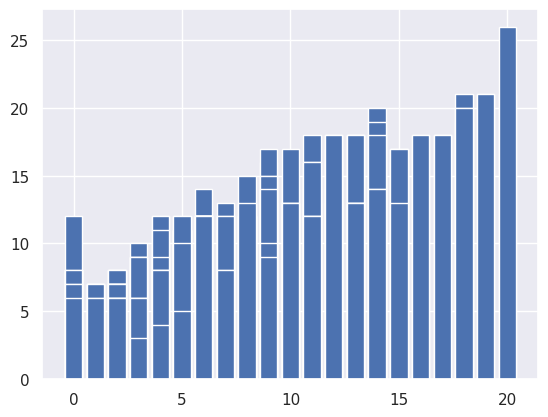

In [ ]:
plt.bar(data['Curricular units 1st sem (credited)'], data['Curricular units 1st sem (approved)'])
plt.show()

<Axes: xlabel='Admission grade', ylabel='Age at enrollment'>

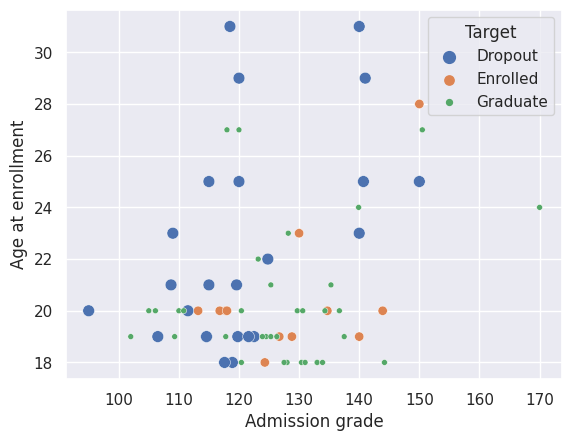

In [ ]:
sns.scatterplot(x = 'Admission grade', y = 'Age at enrollment', data=data[550:625], hue = 'Target', size= 'Target')

In [ ]:
data[data['Age at enrollment']==70]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother,Father,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
689,4,39,2,9147,1,19,133.1,1,37,37,...,0,5,9,0,0.0,0,10.8,1.4,1.74,Dropout


<ipython-input-285-b37f09750c03>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Previous qualification (grade)'])


<Axes: xlabel='Previous qualification (grade)', ylabel='Density'>

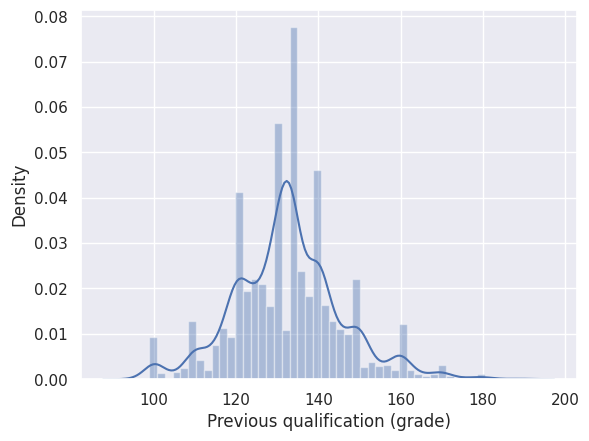

In [ ]:
sns.distplot(data['Previous qualification (grade)'])

<ipython-input-286-aaeb2b39044a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Admission grade'])


<Axes: xlabel='Admission grade', ylabel='Density'>

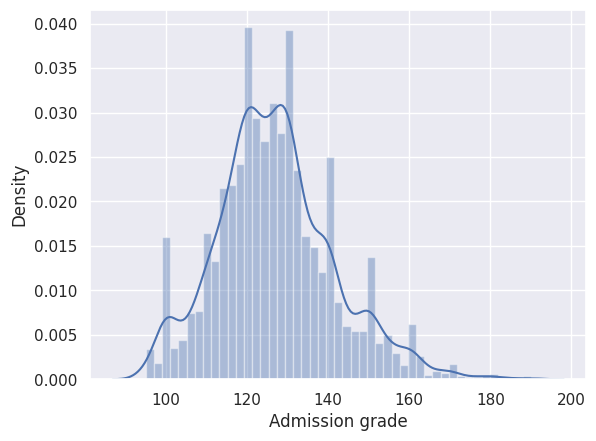

In [ ]:
sns.distplot(data['Admission grade'])

<ipython-input-287-9d24f6e1803d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Curricular units 2nd sem (enrolled)'])


<Axes: xlabel='Curricular units 2nd sem (enrolled)', ylabel='Density'>

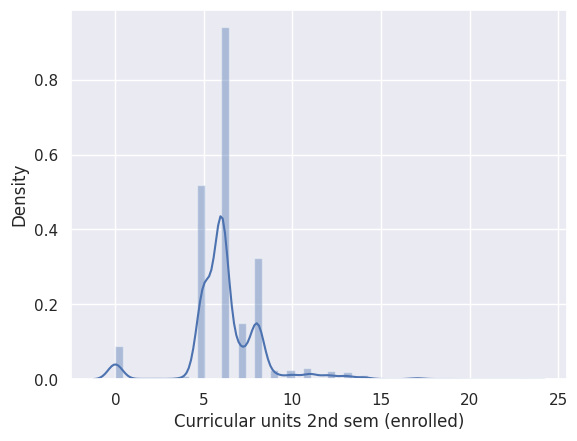

In [ ]:
sns.distplot(data['Curricular units 2nd sem (enrolled)'])

In [ ]:
q = data['Curricular units 2nd sem (enrolled)'].quantile(0.99)
data1 = data[data['Curricular units 2nd sem (enrolled)']<q]
data1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother,Father,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


<ipython-input-289-5c7676a08213>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Curricular units 2nd sem (enrolled)'])


<Axes: xlabel='Curricular units 2nd sem (enrolled)', ylabel='Density'>

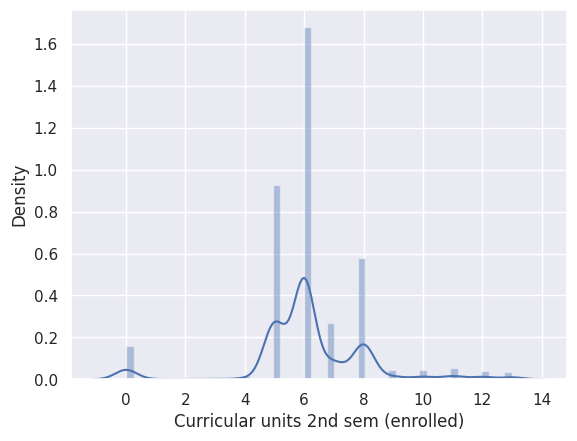

In [ ]:
sns.distplot(data1['Curricular units 2nd sem (enrolled)'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother                                          4424 non-null   int64  
 9   Father                                   

In [ ]:
data.drop(columns=data.columns[7:12], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Admission grade                                 4424 non-null   float64
 8   Displaced                                       4424 non-null   int64  
 9   Educational special needs                

In [ ]:
data.drop(columns=['Gender','Course','Educational special needs'], inplace=True)

In [ ]:
data.drop(columns=data.columns[14:27], inplace=True)

In [ ]:
data.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),GDP,Target
0,1,17,5,1,1,122.0,127.3,1,0,1,0,20,0,0,1.74,Dropout
1,1,15,1,1,1,160.0,142.5,1,0,0,0,19,0,0,0.79,Graduate
2,1,1,5,1,1,122.0,124.8,1,0,0,0,19,0,0,1.74,Dropout
3,1,17,2,1,1,122.0,119.6,1,0,1,0,20,0,0,-3.12,Graduate
4,2,39,1,0,1,100.0,141.5,0,0,1,0,45,0,0,0.79,Graduate


<ipython-input-296-3e4b8751f90b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cbar= True, linewidths=0.1)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


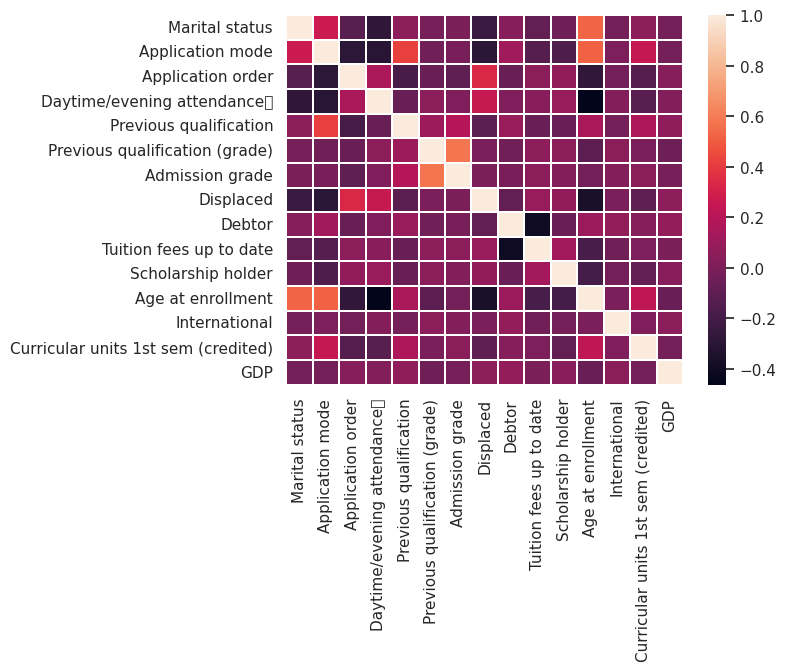

In [ ]:
sns.heatmap(data.corr(), cbar= True, linewidths=0.1)